### Initialize the environment

In [79]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [81]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [82]:
run=1
date_time='2017-02-20_2109' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [83]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'7ecfa

### Load the dataset and visualize the input of the pathways

In [84]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [85]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

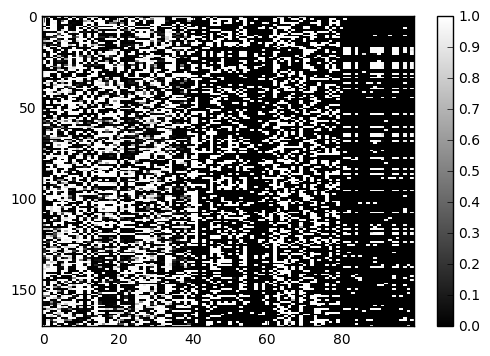

In [86]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [87]:
joint_layer[1:10,1:10]

array([[  9.62316449e-08,   9.99994040e-01,   8.65498077e-05,
          2.22807704e-03,   1.84934732e-04,   2.41297257e-05,
          9.99779999e-01,   1.42547753e-04,   9.96831119e-01],
       [  9.07978276e-04,   9.84349728e-01,   9.99243319e-01,
          1.87204406e-03,   4.15529728e-01,   9.72096443e-01,
          9.51461401e-03,   8.30623503e-06,   2.18461268e-03],
       [  1.37530287e-05,   9.96393025e-01,   9.73430753e-01,
          5.16515784e-03,   9.96196151e-01,   9.75235343e-01,
          1.16088835e-03,   2.93446332e-02,   9.99313779e-03],
       [  2.55428004e-05,   9.97951508e-01,   9.99946952e-01,
          9.50039976e-05,   2.88857780e-02,   4.98417066e-05,
          4.49189581e-02,   3.37561767e-04,   5.35105448e-03],
       [  9.99170959e-01,   9.92674589e-01,   9.91252005e-01,
          3.83902644e-03,   5.75875025e-03,   9.99020815e-01,
          2.32118983e-02,   3.22308653e-04,   9.82742548e-01],
       [  5.46847104e-07,   9.99992192e-01,   1.00000000e+00,
   

### Check the weights distributions

([array([    0.,     0.,   101.,  1721.,  7277.,  7931.,  2729.,   178.,
             0.,     0.]),
  array([  0.00000000e+00,   6.00000000e+00,   3.06000000e+02,
           2.92000000e+03,   8.28500000e+03,   6.35200000e+03,
           1.85800000e+03,   1.96000000e+02,   1.40000000e+01,
           0.00000000e+00]),
  array([    0.,     0.,   113.,  1497.,  6420.,  8891.,  2921.,    95.,
             0.,     0.]),
  array([    0.,     0.,    25.,  1669.,  8531.,  7924.,  1759.,    29.,
             0.,     0.]),
  array([    0.,    16.,   532.,  3658.,  7339.,  5949.,  2136.,   295.,
            12.,     0.]),
  array([    0.,     0.,    39.,  1249.,  8500.,  8242.,  1870.,    37.,
             0.,     0.]),
  array([    0.,     0.,    14.,  2334.,  9612.,  6882.,  1082.,    13.,
             0.,     0.]),
  array([    0.,     0.,    28.,  1654.,  8777.,  7561.,  1865.,    52.,
             0.,     0.]),
  array([  0.00000000e+00,   0.00000000e+00,   1.27000000e+02,
           2.034000

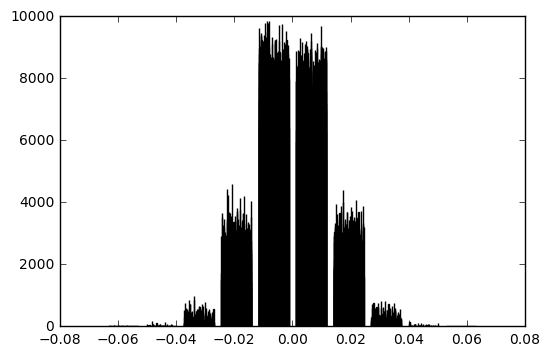

In [88]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x159a589d0>,
 <a list of 3 Text xticklabel objects>)

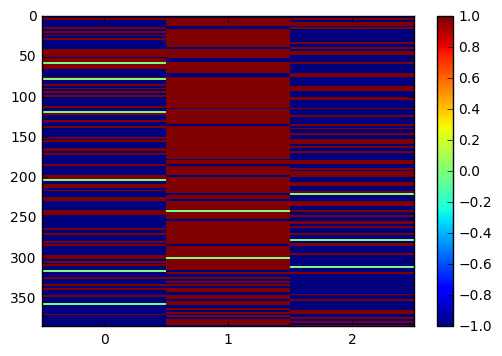

In [89]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x159397bd0>,
 <a list of 3 Text xticklabel objects>)

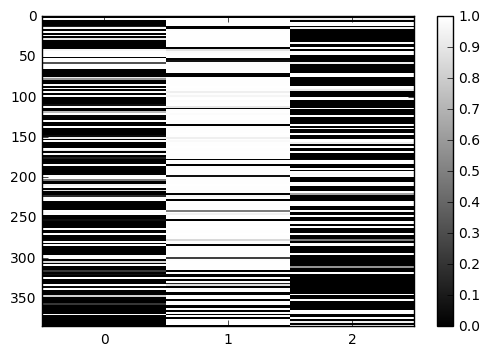

In [90]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 109.,    3.,    2.,    1.,    1.,    1.,    0.,    1.,    4.,   48.]),
  array([  31.,    1.,    1.,    0.,    1.,    0.,    0.,    0.,    3.,  133.]),
  array([ 112.,    0.,    0.,    0.,    1.,    1.,    1.,    0.,    0.,   55.])],
 array([  4.16628962e-28,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

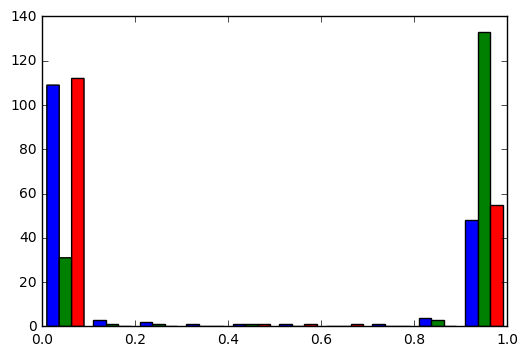

In [91]:
plt.hist(top_output)

In [92]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [93]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 13.,  11.,  57.,  35.,   6.,   4.,  37.,   7.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

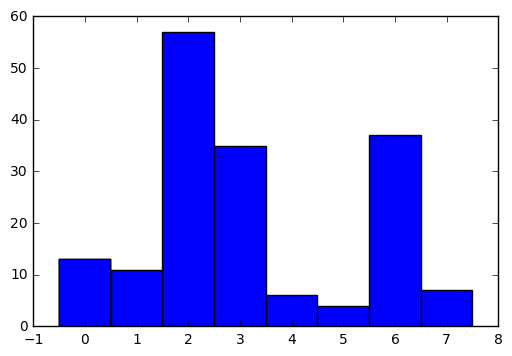

In [94]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [95]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [96]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [97]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


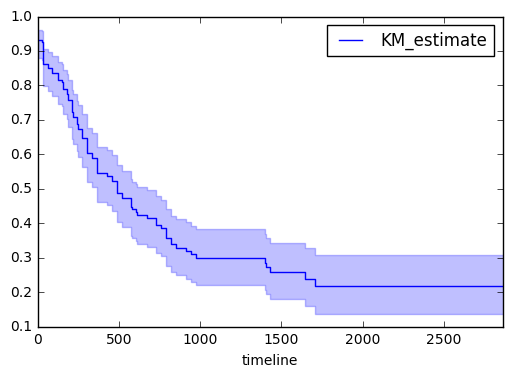

In [98]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

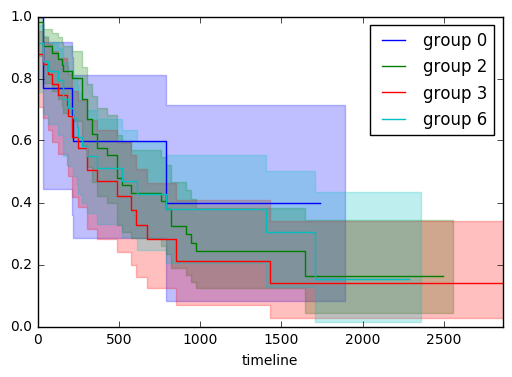

In [100]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [2,3,6]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)